In [1]:
from FinancialMachineLearning.features.microstructure import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../Data/IVEfuture.txt')

In [4]:
data

,Date,time,price,bid,ask,volume
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100
...,...,...,...,...,...,...
10930208,09/14/2023,15:59:59,162.98,162.97,163.00,100
10930209,09/14/2023,15:59:59,162.97,162.97,163.00,471
10930210,09/14/2023,15:59:59,163.00,162.97,163.00,200
10930211,09/14/2023,15:59:59,163.00,162.98,163.00,135


#### Tick rule

In [5]:
aggressor = tick_rule(data['price'])
aggressor

0           1.0
1          -1.0
2           1.0
3           1.0
4           1.0
           ... 
10930208   -1.0
10930209   -1.0
10930210    1.0
10930211    1.0
10930212   -1.0
Length: 10930213, dtype: float64

#### The Roll Model

In [6]:
data

,Date,time,price,bid,ask,volume
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100
...,...,...,...,...,...,...
10930208,09/14/2023,15:59:59,162.98,162.97,163.00,100
10930209,09/14/2023,15:59:59,162.97,162.97,163.00,471
10930210,09/14/2023,15:59:59,163.00,162.97,163.00,200
10930211,09/14/2023,15:59:59,163.00,162.98,163.00,135


In [7]:
roll = RollModel(close_prices = data['price'], window = 20)

In [8]:
measure = roll.roll_measure()
measure

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
              ...   
10930208    0.010260
10930209    0.010563
10930210    0.012978
10930211    0.012978
10930212    0.012978
Name: price, Length: 10930213, dtype: float64

Text(0.5, 1.0, 'Roll Model Measure')

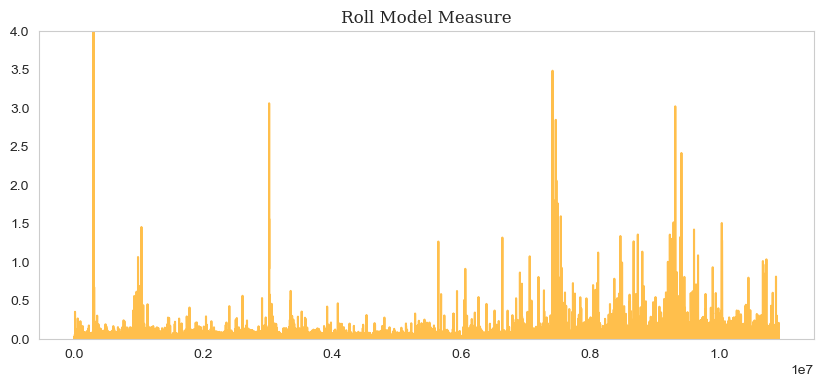

In [10]:
measure.plot(grid = False, figsize = (10,4), alpha = 0.7, color = 'orange')
plt.ylim([0,4])
plt.title('Roll Model Measure', fontsize = 12, fontfamily = 'Serif')

In [11]:
impact = roll.roll_impact(data['volume'] * data['price'])
impact

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
                ...     
10930208    6.295118e-07
10930209    1.376140e-07
10930210    3.980894e-07
10930211    5.897620e-07
10930212    2.540032e-09
Length: 10930213, dtype: float64

Text(0.5, 1.0, 'Roll Model Impact')

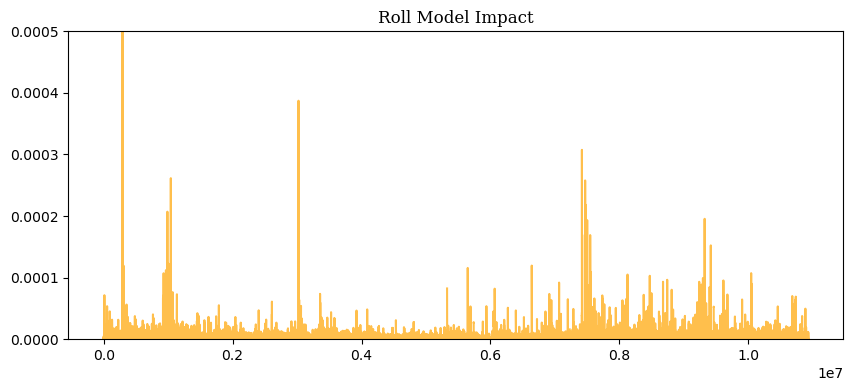

In [10]:
impact.plot(grid = False, figsize = (10,4), alpha = 0.7, color = 'orange')
plt.ylim([0,0.0005])
plt.title('Roll Model Impact', fontsize = 12, fontfamily = 'Serif')

#### Corwin Schultz

In [11]:
dollar = pd.read_csv('./Data/dollar_IVEfuture.csv')

In [12]:
corwin_schultz = CorwinSchultz(dollar['high'], dollar['low'])

In [13]:
spread = corwin_schultz.corwin_schultz_estimator(window = 20)
spread

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
226209    0.001171
226210    0.000698
226211    0.000856
226212    0.001435
226213    0.002154
Name: Spread, Length: 226214, dtype: float64

Text(0.5, 1.0, 'Estimated Corwin Schultz Spread Volatility')

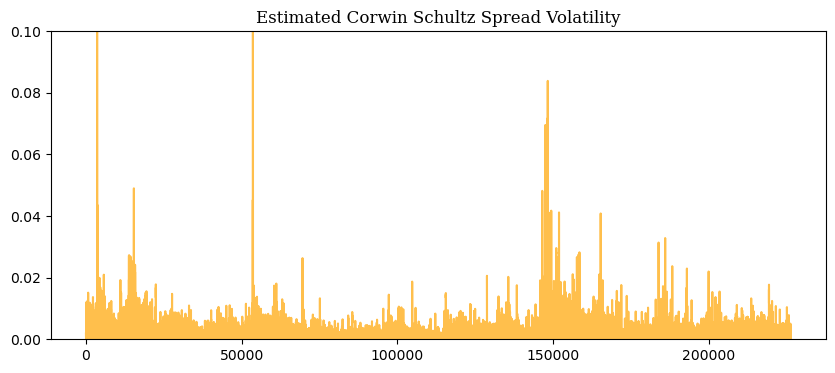

In [14]:
plt.figure(figsize = (10,4))
spread.plot(grid = False, alpha = 0.7, color = 'orange')
plt.ylim([0, 0.1])
plt.title('Estimated Corwin Schultz Spread Volatility', fontsize = 12, fontfamily = 'Serif')

#### Becker Parkinson Volatility

In [15]:
vol = corwin_schultz.becker_parkinson_vol(window = 20)
vol.dropna()

20        0.000000
21        0.000578
22        0.000676
23        0.002373
24        0.001539
            ...   
226209    0.000000
226210    0.000044
226211    0.000000
226212    0.000000
226213    0.000000
Length: 226194, dtype: float64

Text(0.5, 1.0, 'Estimated Backer Parkinson Volatility')

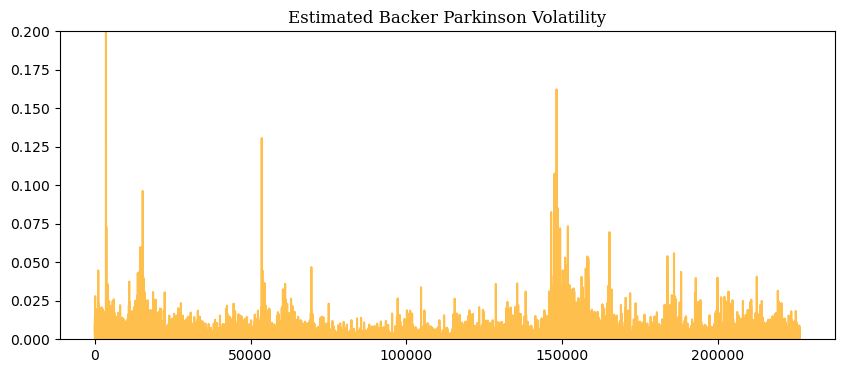

In [16]:
plt.figure(figsize = (10,4))
plt.plot(vol, alpha = 0.7, color = 'orange')
plt.grid(False)
plt.ylim([0, 0.2])
plt.title('Estimated Backer Parkinson Volatility', fontsize = 12, fontfamily = 'Serif')

#### Kyle's Lambda

In [17]:
lambda_feature = BarbasedLambda(close = data['price'],
                                volume = data['volume'],
                                dollar_volume = data.price * data.volume)

In [18]:
kyle_lambda = lambda_feature.kyle()
kyle_lambda.dropna()

20          0.000055
21          0.000049
22          0.000034
23          0.000039
24          0.000039
              ...   
10930208    0.000038
10930209    0.000039
10930210    0.000047
10930211    0.000047
10930212    0.000037
Length: 10898915, dtype: float64

Text(0.5, 1.0, "Kyle's lambda")

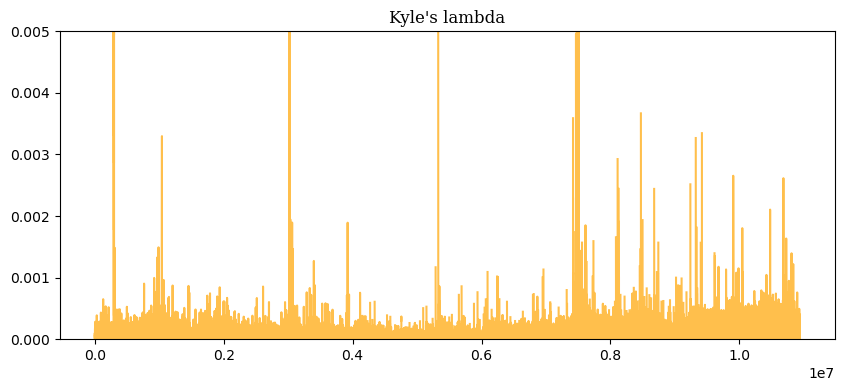

In [19]:
plt.figure(figsize = (10,4))
plt.plot(kyle_lambda, alpha = 0.7, color = 'orange')
plt.grid(False)
plt.ylim([0, 0.005])
plt.title('Kyle\'s lambda', fontsize = 12, fontfamily = 'Serif')

#### Amihud's Lambda

In [20]:
amihud_lambda = lambda_feature.amihud()
amihud_lambda

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
                ...     
10930208    1.436493e-09
10930209    1.476461e-09
10930210    1.758771e-09
10930211    1.758771e-09
10930212    1.384125e-09
Length: 10930213, dtype: float64

Text(0.5, 1.0, "Amihud's lambda")

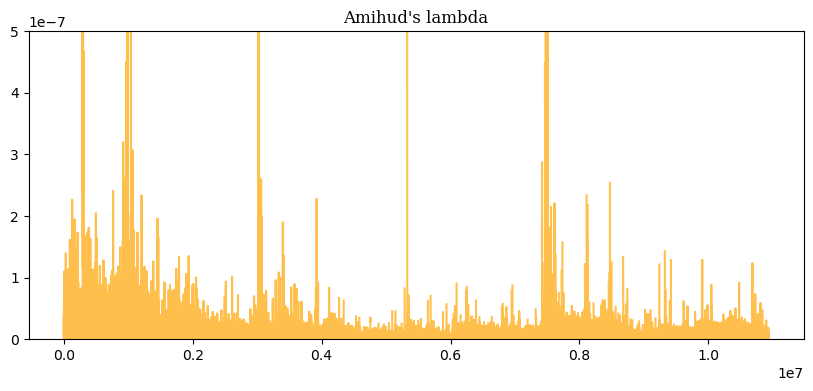

In [21]:
plt.figure(figsize = (10,4))
plt.plot(amihud_lambda, alpha = 0.7, color = 'orange')
plt.grid(False)
plt.ylim([0, 5e-7])
plt.title('Amihud\'s lambda', fontsize = 12, fontfamily = 'Serif')

#### Hasbrouck's Lambda

In [22]:
hasbrouck_lambda = lambda_feature.hasbrouck()
hasbrouck_lambda

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
                ...     
10930208    2.038750e-07
10930209    2.149485e-07
10930210    2.659208e-07
10930211    2.659208e-07
10930212    2.219337e-07
Length: 10930213, dtype: float64

Text(0.5, 1.0, "Hasbrouck's lambda")

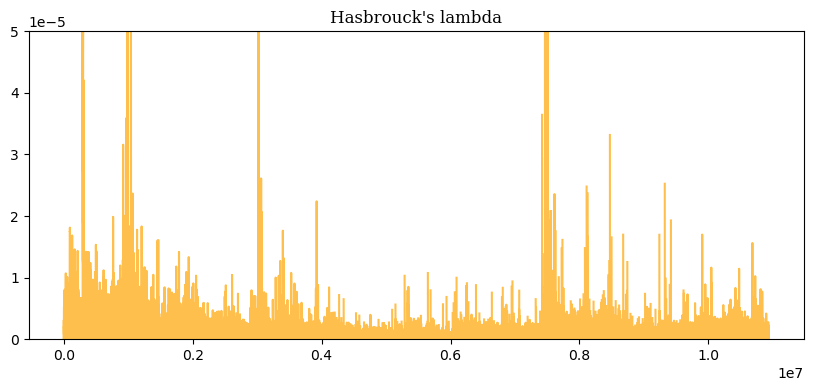

In [23]:
plt.figure(figsize = (10,4))
plt.plot(hasbrouck_lambda, alpha = 0.7, color = 'orange')
plt.grid(False)
plt.ylim([0, 5e-5])
plt.title('Hasbrouck\'s lambda', fontsize = 12, fontfamily = 'Serif')

#### Third Generation : Sequential Trade Models

**VPIN**

In [24]:
from FinancialMachineLearning.barsampling.bar_feature import BarFeature
def buy_volume(df):
    tick_signs = tick_rule(df['price'])
    return (df['volume'] * (tick_signs > 0)).sum()

def sell_volume(df):
    tick_signs = tick_rule(df['price'])
    return (df['volume'] * (tick_signs < 0)).sum()
    
buy_volume_feature = BarFeature(name='buy_volume', function=buy_volume)
sell_volume_feature = BarFeature(name='sell_volume', function=sell_volume)

In [25]:
bars = vpin_volume_bars('./Data/IVEfuture.csv', additional_features = [buy_volume_feature, sell_volume_feature])

Reading data in batches:
Batch number: 0
Returning bars 


In [29]:
# bars.to_csv('./Data/vpin_bar.csv')

In [40]:
vol_thres = 10000
vpin_series = vpin(bars['volume'], bars['buy_volume'], window = 5)

Text(0.5, 1.0, 'VPIN model & Dollar Value Bar')

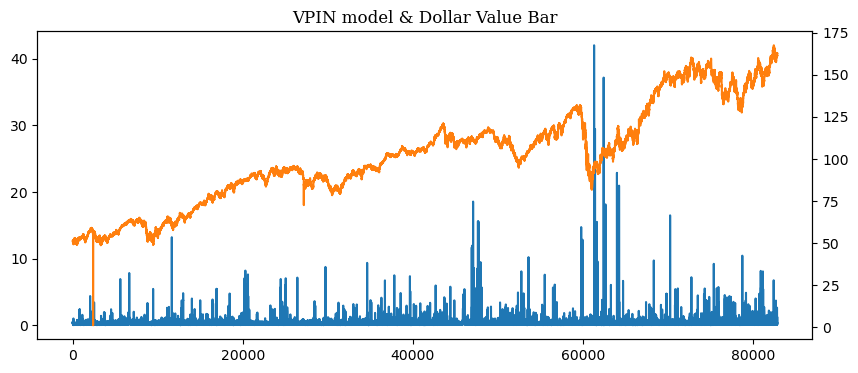

In [41]:
plt.figure(figsize=(10, 4))
vpin_series.plot()
bars['close'].plot(secondary_y = True)
plt.title('VPIN model & Dollar Value Bar', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'VPIN model & Dollar Value Bar')

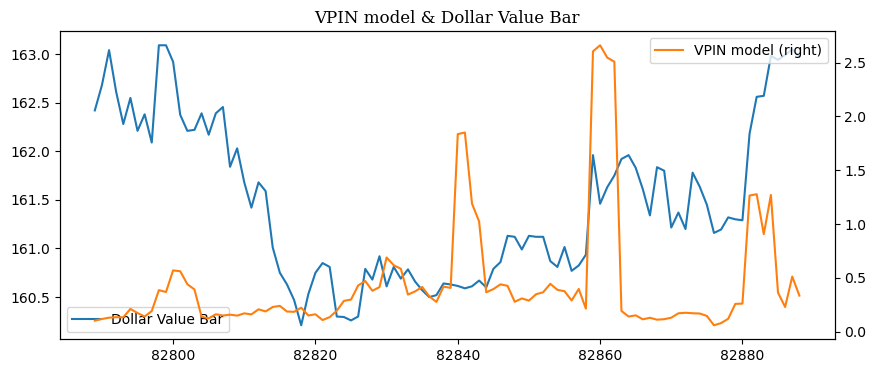

In [42]:
plt.figure(figsize=(10, 4))
bars['close'][-100:].plot(label = 'Dollar Value Bar')
plt.legend()
vpin_series[-100:].plot(label = 'VPIN model', secondary_y = True)
plt.legend()
plt.title('VPIN model & Dollar Value Bar', fontsize = 12, fontfamily = 'Serif')